# Imported Libraries

In [5]:
import math                         
import numpy as np                  
import pandas as pd               
import seaborn as sns              
import matplotlib.pyplot as plt   
%matplotlib inline                 
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15, 10)
import yfinance as yf
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import metrics

# Question 1.3

In [6]:
################################################Download all 30 stocks on Dow Jones market of 1 year###############################################
data = yf.download("MMM AXP AMGN AAPL BA CAT CVX CSCO KO DIS DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT", start="2020-01-01", end="2020-12-31")

[*********************100%***********************]  30 of 30 completed


In [7]:
################################################View the dataframe###########################################################
data

Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2019-12-31   72.337975  227.546417  120.897179  323.833313  140.427734   
2020-01-02   73.988464  226.630844  122.641548  331.348572  143.137787   
2020-01-03   73.269157  225.092255  121.423416  330.791901  141.150406   
2020-01-06   73.852997  226.819595  120.897179  331.766083  141.055313   
2020-01-07   73.505638  224.686371  120.263771  335.285156  139.191589   
...                ...         ...         ...         ...         ...   
2020-12-23  130.157623  216.249954  115.602333  219.690002  174.769028   
2020-12-24  131.161407  216.240250  115.997726  217.149994  175.885696   
2020-12-28  135.852509  216.938644  116.996086  216.089996  174.720047   
2020-12-29  134.043640  220.062012  116.778625  216.250000  173.035233   
2020-12-30  132.900681  220.353027  118.053757  216.669998  176.355865   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2019-12-31  162.639999  45.045673  108.367821  144.630005  49.223129  ...   
2020-01-02  166.990005  45.812046  109.195122  148.199997  48.341732  ...   
2020-01-03  166.169998  45.064598  108.817444  146.500000  47.145565  ...   
2020-01-06  173.449997  45.225437  108.448738  145.649994  46.956692  ...   
2020-01-07  176.000000  44.932140  107.063896  145.699997  46.938702  ...   
...                ...        ...         ...         ...        ...  ...   
2020-12-23  227.429993  43.115715   81.422333  173.550003  52.385063  ...   
2020-12-24  225.779999  43.271160   81.080269  173.729996  52.423328  ...   
2020-12-28  224.639999  43.640331   80.671677  178.860001  51.944931  ...   
2020-12-29  222.460007  43.368313   80.396118  177.300003  51.983204  ...   
2020-12-30  222.399994  43.212868   81.080269  181.169998  53.073956  ...   

              Volume                                                          \
                 MRK      MSFT      NKE       PG      TRV      UNH         V   
Date                                                                           
2019-12-31   4710760  18369400  3213600  4798900   765100  2224200   5273000   
2020-01-02   8251428  22622100  5644100  8130800  1117300  2543400   8733000   
2020-01-03   5903698  21116200  4541800  7970500   927300  2711400   4899700   
2020-01-06   7522963  20813700  4612400  6674400   952800  3079100  10109500   
2020-01-07  11132275  21634100  6719900  7583400  1204600  2492900   4392300   
...              ...       ...      ...      ...      ...      ...       ...   
2020-12-23   6056078  18699600  3388300  6004200  1901500  2348100   6523100   
2020-12-24   2957456  10550600  1821900  2588200   416800  1360600   3367900   
2020-12-28   4804242  17933500  4081500  3714700  1100300  2308200   5816200   
2020-12-29   5708037  17403200  3232400  5139300   859000  2275700   6093400   
2020-12-30   5933357  20272300  3052100  3261400  1253800  1866000   8875100   

                                        
                  VZ      WBA      WMT  
Date                                    
2019-12-31   8466700  3305100  4912000  
2020-01-02  11447900  5700500  6764900  
2020-01-03  13263200  4892300  5399200  
2020-01-06  15094500  6003300  6445500  
2020-01-07  14293100  4365700  6846900  
...              ...      ...      ...  
2020-12-23  14012100  4200200  6810200  
2020-12-24   7751100  2678000  3018200  
2020-12-28  15355600  4714500  6448300  
2020-12-29  15686100  4004400  5979400  
2020-12-30  18259800  4194300  6250400  

[253 rows x 180 columns]

In [8]:
#################################Calculating the correlation Matrix################################################

adjCloseDataFrame = data['Adj Close'] #Selecting the Adjust close data into a dataframe

calculateDailyReturns = adjCloseDataFrame.pct_change() #Computing the daily returns

returnsWithOutNan = calculateDailyReturns.dropna() #Drop Nan columns

####################Correlation Matrix##############################

correlationMatrix = returnsWithOutNan.corr()

correlationMatrix

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.615680,0.516685,0.461934,0.503595,0.625333,0.661647,0.494083,0.523452,0.484998,...,0.580828,0.839827,0.607932,0.637722,0.479938,0.648520,0.708651,0.554541,0.399512,0.535943
AMGN,0.615680,1.000000,0.437392,0.281145,0.518721,0.492168,0.641801,0.457527,0.413896,0.477098,...,0.683489,0.694477,0.446720,0.696563,0.468331,0.662442,0.612804,0.605116,0.483582,0.586318
AXP,0.516685,0.437392,1.000000,0.745926,0.719765,0.419908,0.623556,0.803646,0.764634,0.695980,...,0.500573,0.552070,0.662400,0.461506,0.713649,0.650305,0.824939,0.530774,0.521158,0.257200
BA,0.461934,0.281145,0.745926,1.000000,0.591244,0.367936,0.492344,0.687186,0.635969,0.599997,...,0.398143,0.455627,0.602972,0.363946,0.619804,0.523232,0.646374,0.426925,0.430645,0.165122
CAT,0.503595,0.518721,0.719765,0.591244,1.000000,0.390585,0.669773,0.694986,0.668463,0.805872,...,0.557278,0.538153,0.634748,0.554038,0.622410,0.579197,0.712169,0.637697,0.589780,0.358957
CRM,0.625333,0.492168,0.419908,0.367936,0.390585,1.000000,0.520447,0.409365,0.449949,0.449342,...,0.491914,0.729245,0.490855,0.432712,0.445041,0.479830,0.616199,0.402696,0.239883,0.391731
CSCO,0.661647,0.641801,0.623556,0.492344,0.669773,0.520447,1.000000,0.582451,0.642055,0.590634,...,0.611871,0.720756,0.589940,0.669300,0.519163,0.618463,0.732229,0.659258,0.601147,0.521883
CVX,0.494083,0.457527,0.803646,0.687186,0.694986,0.409365,0.582451,1.000000,0.671889,0.644706,...,0.581003,0.546258,0.610503,0.433666,0.712497,0.658583,0.771201,0.507316,0.438332,0.238243
DIS,0.523452,0.413896,0.764634,0.635969,0.668463,0.449949,0.642055,0.671889,1.000000,0.593550,...,0.436815,0.579329,0.624562,0.456461,0.535352,0.531838,0.738747,0.487648,0.452047,0.296455
DOW,0.484998,0.477098,0.695980,0.599997,0.805872,0.449342,0.590634,0.644706,0.593550,1.000000,...,0.508490,0.512767,0.602562,0.490054,0.705902,0.521656,0.687704,0.579112,0.544706,0.390025


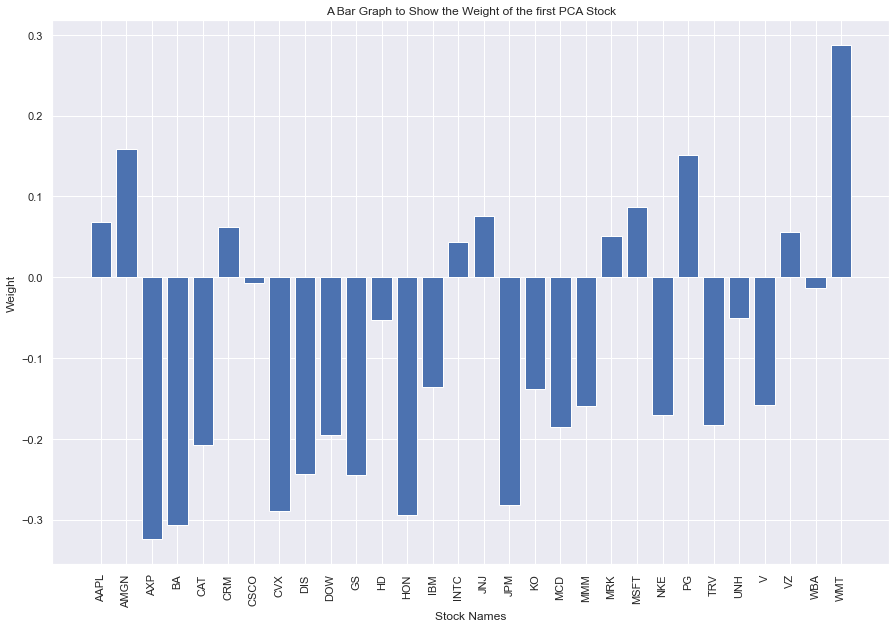

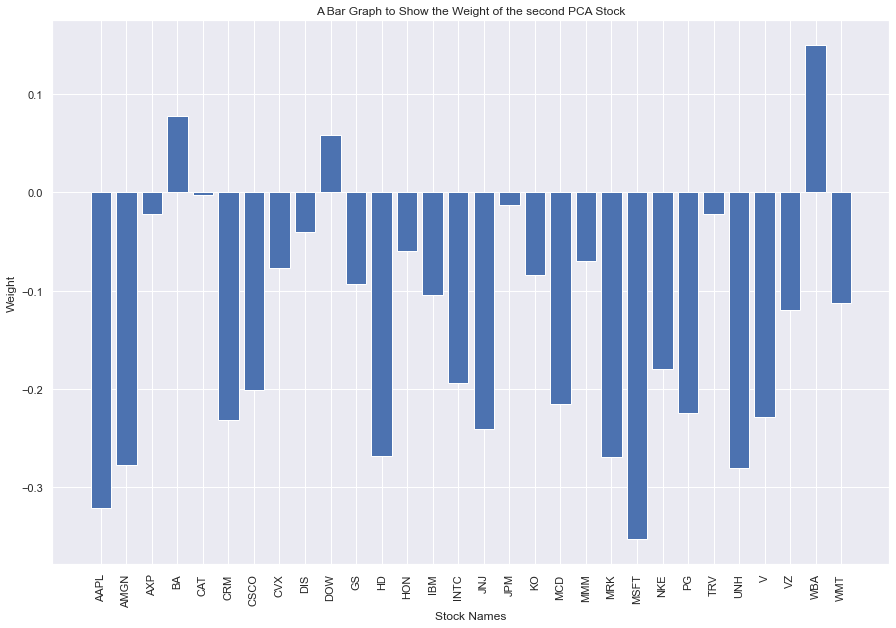

In [9]:
################################Using the correlation Matrix for PCA and plotting the bar graph#####################

pcaModel = PCA()

fitPCAModel = pcaModel.fit(correlationMatrix)

storePCAComponent = fitPCAModel.components_

storeAdjCloseColumns = adjCloseDataFrame.columns

############################### Plot for PCA 1 #######################################

plt.bar(storeAdjCloseColumns, storePCAComponent[0])
plt.xticks(rotation=90)
plt.title("A Bar Graph to Show the Weight of the first PCA Stock")
plt.xlabel("Stock Names")
plt.ylabel("Weight")
plt.show()

############################### Plot for PCA 2 #######################################

plt.bar(storeAdjCloseColumns, storePCAComponent[1])
plt.xticks(rotation=90)
plt.title("A Bar Graph to Show the Weight of the second PCA Stock")
plt.xlabel("Stock Names")
plt.ylabel("Weight")
plt.show()


In [10]:
# Is the first or second principal component similar to the market (equal weight on each stock)? Discuss why?

In [11]:
#Download the Dow Jone Industrial average data

data_djia = yf.download('^DJI', start="2020-01-01", end="2020-12-31")

data_djia

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,28414.640625,28547.349609,28376.490234,28538.439453,28538.439453,193340000
2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000
2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000
2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000
2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000
...,...,...,...,...,...,...
2020-12-23,30046.730469,30292.529297,30046.730469,30129.830078,30129.830078,274050000
2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000


In [12]:
##################Compute the value of daily returns################
data_djia_adjColumn = data_djia['Adj Close']

data_djia['Returns'] = data_djia_adjColumn.pct_change()

data_djia

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-12-31,28414.640625,28547.349609,28376.490234,28538.439453,28538.439453,193340000,NaN
2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000,0.011576
2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000,-0.008103
2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000,0.002392
2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000,-0.004170
...,...,...,...,...,...,...,...
2020-12-23,30046.730469,30292.529297,30046.730469,30129.830078,30129.830078,274050000,0.003809
2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000,0.002325
2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000,0.006758


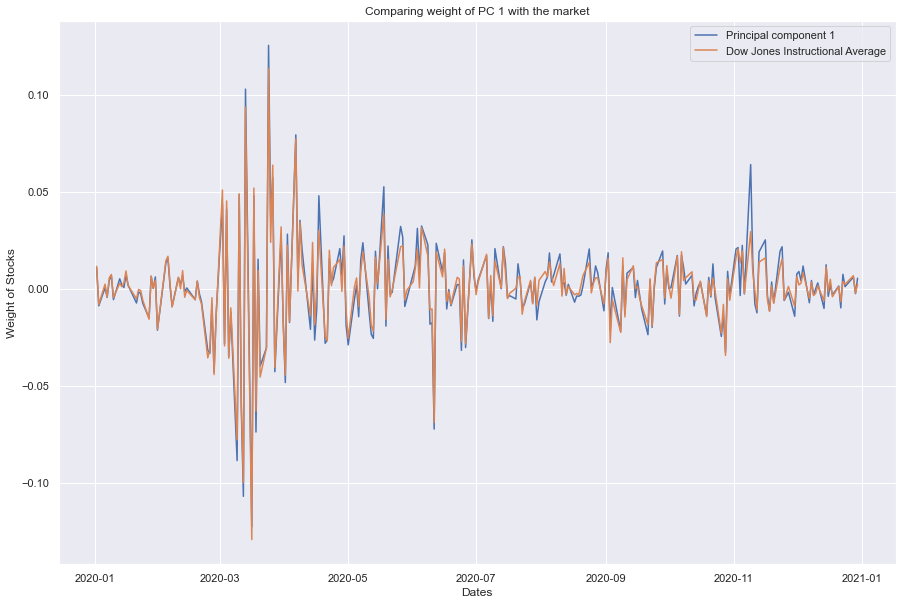

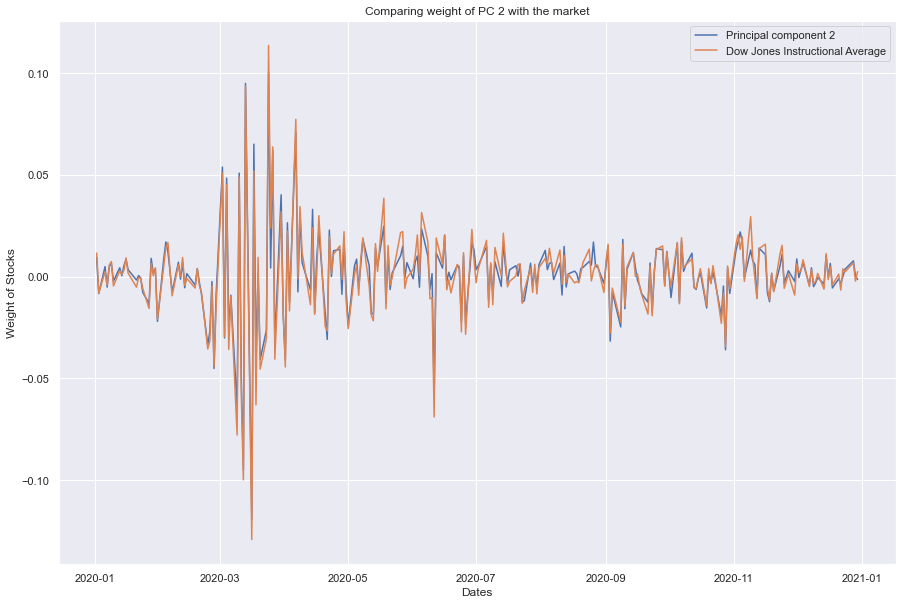

In [13]:
#####################Calculate the weight for Principal Component 1##################################################
pc1 = storePCAComponent[0]

pc1Sum = sum(abs(pc1)) 

pc1WeightValues = abs(pc1)/(pc1Sum)

pc1WeightValues = np.array(pc1WeightValues)

returnsWeight = returnsWithOutNan * pc1WeightValues

returnsWeight['values'] = returnsWeight.sum(axis=1)

plt.plot(returnsWeight.index, returnsWeight['values'], label="Principal component 1")
plt.plot(data_djia.index, data_djia['Returns'], label = 'Dow Jones Instructional Average')
plt.ylabel("Weight of Stocks")
plt.xlabel("Dates")
plt.title("Comparing weight of PC 1 with the market")
plt.legend()
plt.show()

#####################Calculate the weight for Principal Component 2########################################
pc2 = storePCAComponent[1]

pc2Sum = sum(abs(pc2)) 

pc2WeightValues = abs(pc2)/(pc2Sum)

pc2WeightValues = np.array(pc2WeightValues)

returnsWeight2 = returnsWithOutNan * pc2WeightValues

returnsWeight2['values'] = returnsWeight2.sum(axis=1)

plt.plot(returnsWeight2.index, returnsWeight2['values'], label="Principal component 2")
plt.plot(data_djia.index, data_djia['Returns'], label = 'Dow Jones Instructional Average')
plt.ylabel("Weight of Stocks")
plt.xlabel("Dates")
plt.title("Comparing weight of PC 2 with the market")
plt.legend()
plt.show()

# Question 1.4



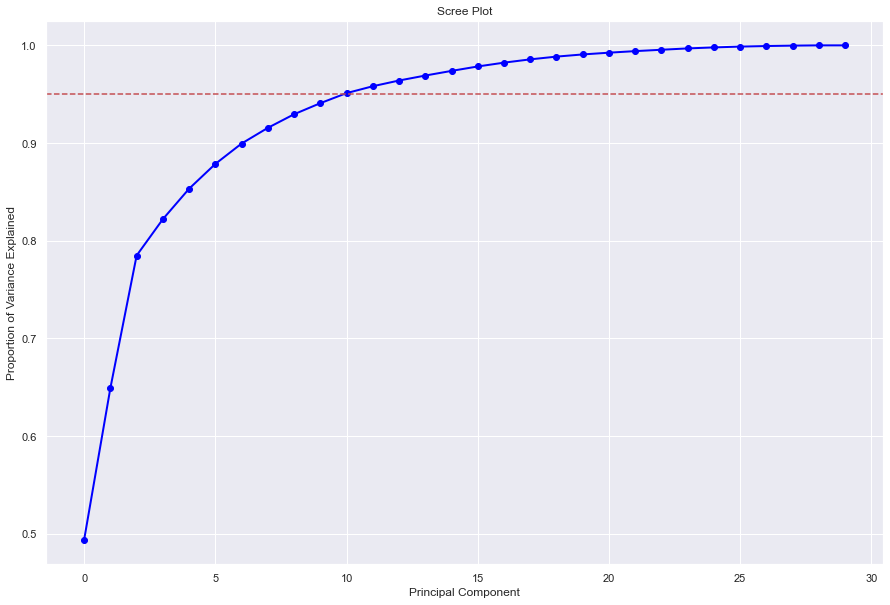

In [14]:
#Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. 

amountOfVarianceExplained = pcaModel.explained_variance_ratio_

returnCumSum = np.cumsum(amountOfVarianceExplained)

plt.plot(returnCumSum,  'o-', linewidth=2, color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label ="95% variance")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


In [15]:
#How many principal components are required to explain 95% of the variance?
#Add up the values in the cummulative sum to know how many required to explain 95% of the variance

getNumberPcaRequired = next(x for x, val in enumerate(returnCumSum)if val > 0.95)+ 1

print(f"{getNumberPcaRequired}, is the number of principal components required to explain 95% of the variance")

11, is the number of principal components required to explain 95% of the variance


# Question 1.5

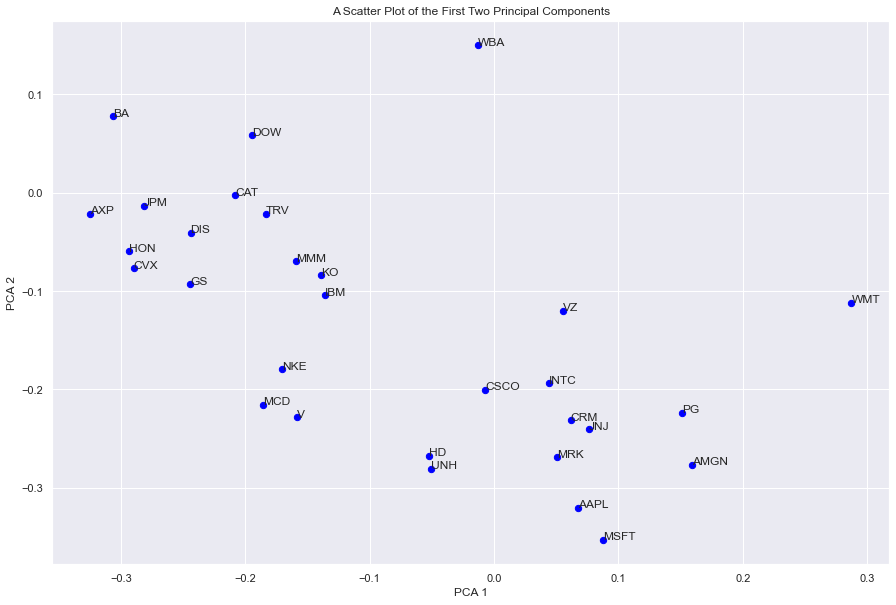

-0.08669434514612505, is the average of all stocks in PCA 1
 -0.1338734593828558 is the average of all stocks in PCA 2


In [16]:
# Investigate the scatter plot of the first two principal components and calculate the average
#of all 30 stocks. Based on Euclidean distances away from this average, identify the three
#most distant stocks. Can you explain why these stocks are unusual?

storeAdjCloseColumns = adjCloseDataFrame.columns
for x, storeAdjCloseColumns in enumerate(storeAdjCloseColumns):
     plt.annotate(storeAdjCloseColumns, xy=(storePCAComponent[0][x], storePCAComponent[1][x]))
plt.scatter(storePCAComponent[0], storePCAComponent[1], s=40, c='blue')
plt.title("A Scatter Plot of the First Two Principal Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

###############################Calculating the Average###############################
# changeToDataFrame = pd.DataFrame(storePCAComponent).T

averageOfStockPCA1 = np.mean(storePCAComponent[0])

averageOfStockPCA2 = np.mean(storePCAComponent[1])

print(f"{averageOfStockPCA1}, is the average of all stocks in PCA 1\n {averageOfStockPCA2} is the average of all stocks in PCA 2")

############################Euclidean Distance ########################## 
changeAverageStockList = np.array((averageOfStockPCA1, averageOfStockPCA2))

listDistance = []
for i in range (len(storePCAComponent)):
    distance = np.linalg.norm((changeAverageStockList)- np.array(storePCAComponent[0][i], storePCAComponent[1][i]))
    listDistance.append(distance)
# sortListDistance = sorted(listDistance, reverse=True)
# print(f"{listDistance}")




In [17]:
#Dataframe to hold the Distance and Tickers 
storeAdjCloseColumns = adjCloseDataFrame.columns
df = pd.DataFrame(list(zip(storeAdjCloseColumns, listDistance)),columns =['Tickers', 'Distance'])

df

,Tickers,Distance
0,AAPL,0.254097
1,AMGN,0.382375
2,AXP,0.304635
3,BA,0.278844
4,CAT,0.142250
5,CRM,0.245304
6,CSCO,0.149853
7,CVX,0.255795
8,DIS,0.192005
9,DOW,0.124157


In [18]:
#Largest values in the dataframe 
df.nlargest(3, ['Distance'])

,Tickers,Distance
29,WMT,0.563144
1,AMGN,0.382375
23,PG,0.371558


# Question 2.3

In [19]:
#Use the correlation matrix from question (1.3) above to provide pairwise distances
# between the 30 stocks. Give the formula for this rescaled distance and provide an
# interpretation of small and large distances  (2(1 − ρij))1/2

pairwiseDistance =(2 *(1 - correlationMatrix))**(0.5)

pairwiseDistance

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000000,0.876721,0.983173,1.037368,0.996398,0.865641,0.822622,1.005899,0.976266,1.014891,...,0.915611,0.565992,0.885514,0.851209,1.019865,0.838427,0.763347,0.943885,1.095890,0.963386
AMGN,0.876721,0.000000,1.060762,1.199046,0.981100,1.007801,0.846403,1.041608,1.082685,1.022646,...,0.795627,0.781695,1.051932,0.779022,1.031183,0.821655,0.879996,0.888689,1.016285,0.909595
AXP,0.983173,1.060762,0.000000,0.712845,0.748645,1.077118,0.867691,0.626665,0.686099,0.779769,...,0.999426,0.946499,0.821706,1.037780,0.756771,0.836295,0.591712,0.968737,0.978614,1.218852
BA,1.037368,1.199046,0.712845,0.000000,0.904164,1.124335,1.007627,0.790966,0.853265,0.894430,...,1.097139,1.043430,0.891099,1.127877,0.872005,0.976492,0.840983,1.070584,1.067104,1.292190
CAT,0.996398,0.981100,0.748645,0.904164,0.000000,1.104006,0.812683,0.781043,0.814294,0.623102,...,0.940981,0.961090,0.854695,0.944417,0.869010,0.917391,0.758724,0.851238,0.905781,1.132292
CRM,0.865641,1.007801,1.077118,1.124335,1.104006,0.000000,0.979340,1.086863,1.048858,1.049436,...,1.008053,0.735873,1.009103,1.065165,1.053527,1.019970,0.876129,1.092981,1.232978,1.102968
CSCO,0.822622,0.846403,0.867691,1.007627,0.812683,0.979340,0.000000,0.913837,0.846103,0.904838,...,0.881055,0.747320,0.905605,0.813265,0.980650,0.873541,0.731807,0.825520,0.893143,0.977872
CVX,1.005899,1.041608,0.626665,0.790966,0.781043,1.086863,0.913837,0.000000,0.810075,0.842963,...,0.915420,0.952619,0.882606,1.064269,0.758291,0.826338,0.676460,0.992657,1.059875,1.234307
DIS,0.976266,1.082685,0.686099,0.853265,0.814294,1.048858,0.846103,0.810075,0.000000,0.901609,...,1.061306,0.917246,0.866531,1.042630,0.964000,0.967638,0.722846,1.012276,1.046855,1.186208
DOW,1.014891,1.022646,0.779769,0.894430,0.623102,1.049436,0.904838,0.842963,0.901609,0.000000,...,0.991474,0.987151,0.891558,1.009897,0.766940,0.978104,0.790311,0.917483,0.954247,1.104514


# Question 2.4

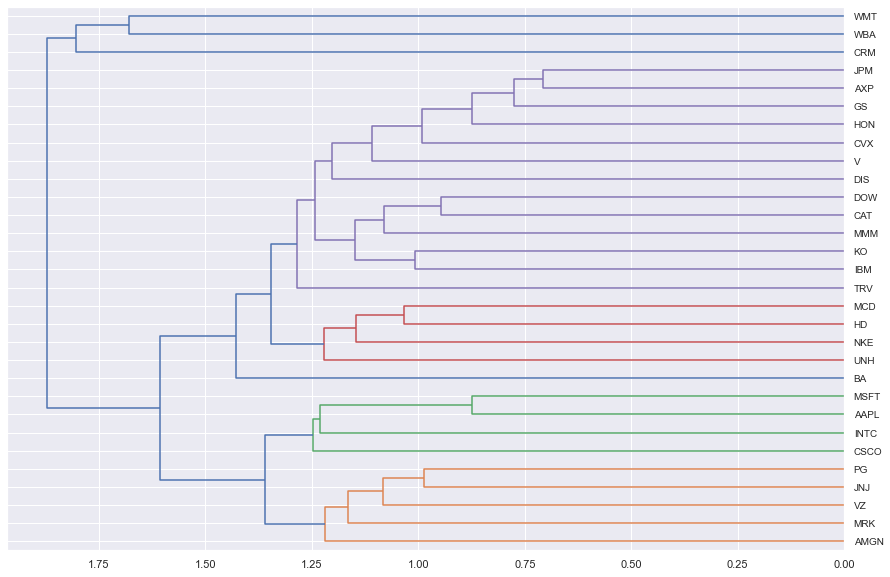

In [20]:
# Construct a horizontal dendrogram using the average linkage approach, carefully labelling the graphic with the names of the 30 stocks
#Dataframe to hold the Distance and Tickers 
storeAdjCloseColumns = adjCloseDataFrame.columns
getLinkage = linkage(pairwiseDistance, method='average')
dn = dendrogram(getLinkage, orientation = 'left', labels=storeAdjCloseColumns)
plt.show()

# Question 2.5

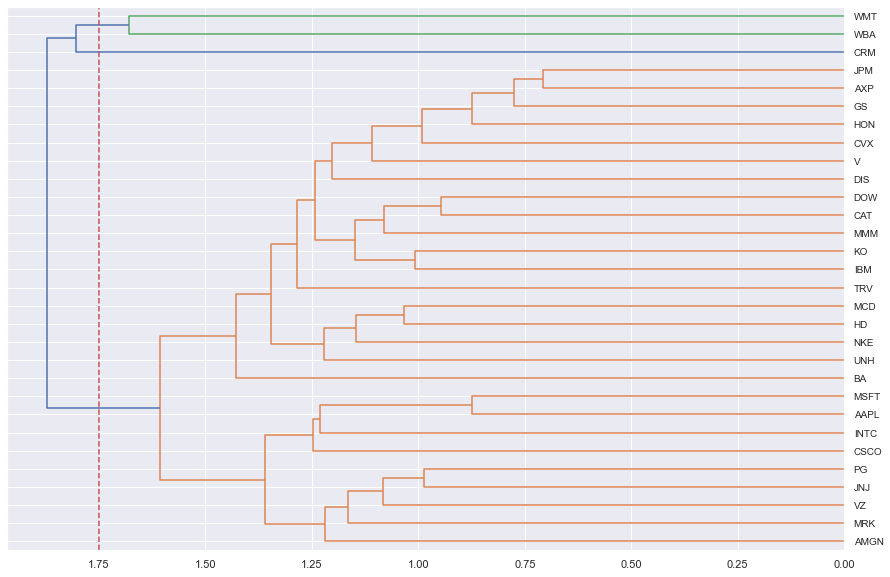

In [21]:
#Creating a cluster
storeAdjCloseColumns = adjCloseDataFrame.columns
getLinkage = linkage(pairwiseDistance, method='average')
dn = dendrogram(getLinkage, orientation = 'left', labels=storeAdjCloseColumns, color_threshold = 1.75)
plt.axvline(x=1.75, color='r', linestyle='--', label ="Cluster")
plt.show()

In [22]:
#List of Clusters
for i in range(len(dn['ivl'])):
    print(f"{dn['ivl'][i]}, is in cluster {dn['leaves_color_list'][i]}")

AMGN, is in cluster C1
MRK, is in cluster C1
VZ, is in cluster C1
JNJ, is in cluster C1
PG, is in cluster C1
CSCO, is in cluster C1
INTC, is in cluster C1
AAPL, is in cluster C1
MSFT, is in cluster C1
BA, is in cluster C1
UNH, is in cluster C1
NKE, is in cluster C1
HD, is in cluster C1
MCD, is in cluster C1
TRV, is in cluster C1
IBM, is in cluster C1
KO, is in cluster C1
MMM, is in cluster C1
CAT, is in cluster C1
DOW, is in cluster C1
DIS, is in cluster C1
V, is in cluster C1
CVX, is in cluster C1
HON, is in cluster C1
GS, is in cluster C1
AXP, is in cluster C1
JPM, is in cluster C1
CRM, is in cluster C0
WBA, is in cluster C2
WMT, is in cluster C2


# Question 3.4

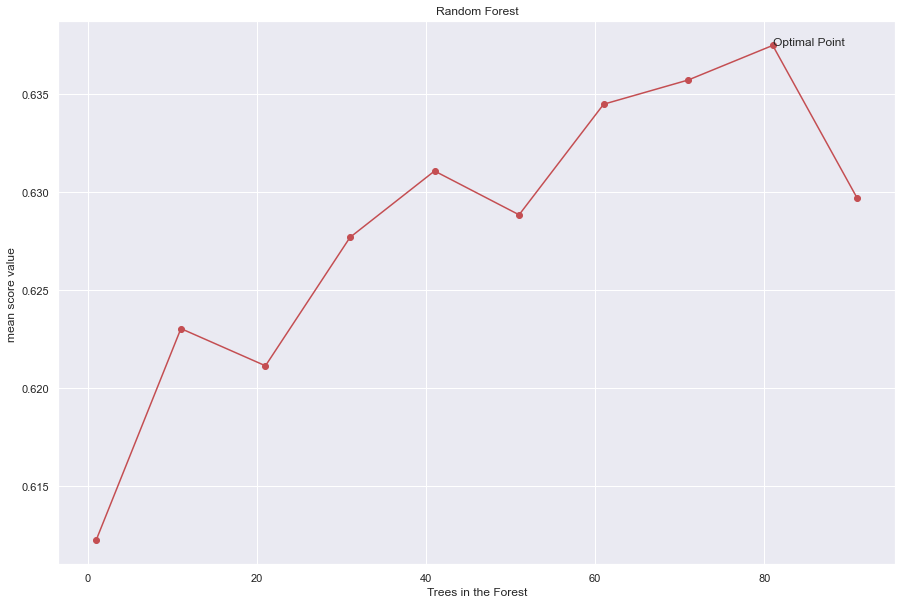

The maximum value in the list is 0.6374955141476881, which is the optimal number of trees


In [23]:
##################################################Load Titanic Data into a DataFrame#####################################
titanicDataframe = pd.read_csv("titanic3.csv")

titanicDataframePredictor = titanicDataframe[['pclass', 'age', 'sex']]

#Get the mean of the  age column and fill  with the null
titanicDataframePredictor['age'] = titanicDataframePredictor['age'].fillna(titanicDataframePredictor['age'].mean())

titanicDataframePredictor['sex'] = titanicDataframePredictor["sex"].replace(["female", "male"], [0,1])

##################### Create and Fit the model for Random Forest###################

TreeList = list(range(1, 100, 10))

values = []

#iterate over the neighbour List
for k in TreeList:
    RandForestValueTree = RandomForestClassifier(n_estimators = k, random_state=0)
    RandForestValueTree.fit(titanicDataframePredictor, titanicDataframe["survived"])
    PredictionValue = RandForestValueTree.predict(titanicDataframePredictor)
    crossValidationValues = cross_validate(RandForestValueTree, titanicDataframePredictor, titanicDataframe["survived"], cv=5, scoring='balanced_accuracy')
    getMeanScore = np.mean(crossValidationValues['test_score'])
    values.append(getMeanScore)
    
plt.plot(TreeList, values, "ro-")
plt.text(81, max(values), "Optimal Point")
plt.ylabel("mean score value ")
plt.xlabel("Trees in the Forest")
plt.title("Random Forest")
plt.show()

###############################Getting the max in the list###################################
getMaxValuesInList = max(values)

print(f"The maximum value in the list is {getMaxValuesInList}, which is the optimal number of trees")


# Question 3.5

In [24]:
############################Random Forest##############################
RandForestClf = RandomForestClassifier(n_estimators=81, random_state=0)

RandForestClf.fit(titanicDataframePredictor, titanicDataframe["survived"])

#Logistic Regression

lRegression = linear_model.LogisticRegression()

lRegression.fit(titanicDataframePredictor, titanicDataframe["survived"])

#KNN
classifierValue = KNeighborsClassifier(n_neighbors= 5, metric="euclidean")

classifierValue.fit(titanicDataframePredictor, titanicDataframe["survived"])

#Tree Classification
TreeModel = DecisionTreeClassifier(random_state=0, ccp_alpha=0.010)

TreeModel.fit(titanicDataframePredictor, titanicDataframe["survived"])

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

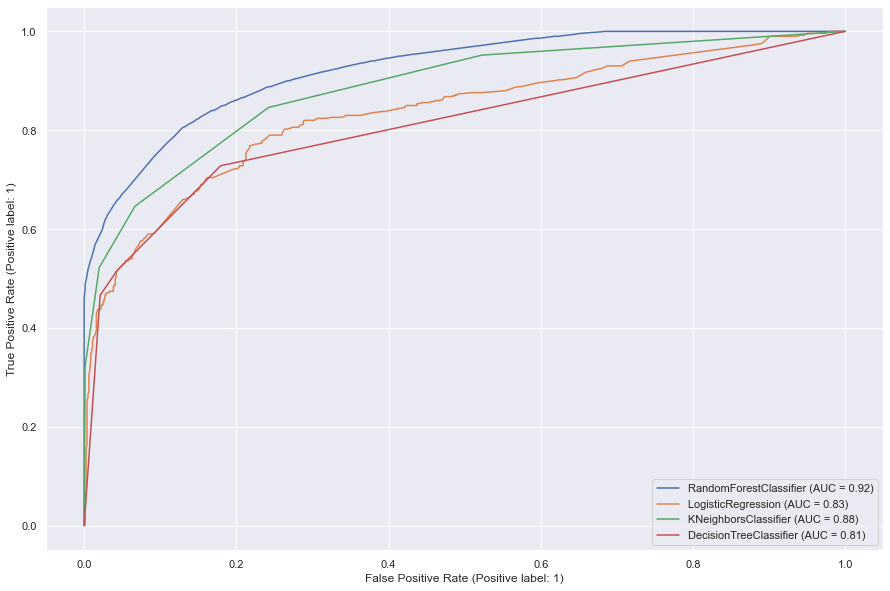

In [25]:
#Plot the metrics
holdMetrics = metrics.plot_roc_curve(RandForestClf, titanicDataframePredictor, titanicDataframe["survived"])
metrics.plot_roc_curve(lRegression, titanicDataframePredictor, titanicDataframe["survived"], ax=holdMetrics.ax_) 
metrics.plot_roc_curve(classifierValue, titanicDataframePredictor, titanicDataframe["survived"], ax=holdMetrics.ax_) 
metrics.plot_roc_curve(TreeModel, titanicDataframePredictor, titanicDataframe["survived"], ax=holdMetrics.ax_) 
plt.show()

# Question 4.2

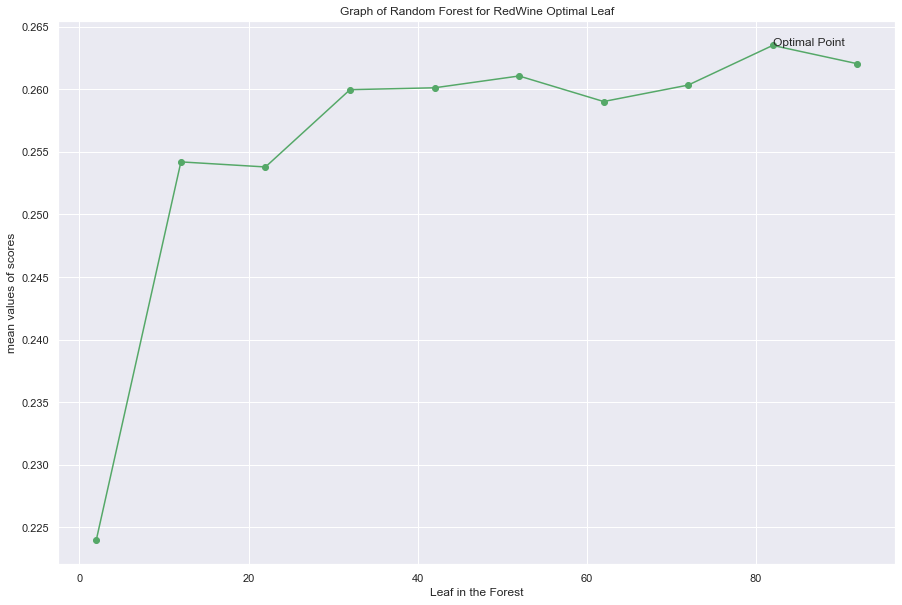

The maximum value in the list is 0.26351682495361944, which is the optimal number of trees


In [26]:
##########################################Random Forest for Red Wine########################################### 
redWineDataFrame = pd.read_csv("winequality-red.csv")

redWineDataFrame[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol','quality']] = redWineDataFrame['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

removeDefaultColumns = ['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']

redWineDataFrame.drop(removeDefaultColumns, axis = 1, inplace=True)

redWineDataFrame = redWineDataFrame.astype(float)

redWineDataFrameCorr = redWineDataFrame.loc[:, redWineDataFrame.columns != 'quality']

###########################Building Random Forest#########################################

TreeListRedWine = list(range(2, 100, 10))

valuesRedWine = []

#iterate over the List
for k in TreeListRedWine:
    RandForestValueLeaf = RandomForestClassifier(max_leaf_nodes = k, random_state=0)
    RandForestValueLeaf.fit(redWineDataFrameCorr, redWineDataFrame["quality"])
    PredictionValue = RandForestValueLeaf.predict(redWineDataFrameCorr)
    crossValidationValues = cross_validate(RandForestValueLeaf, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring='balanced_accuracy')
    getMeanScore = np.mean(crossValidationValues['test_score'])
    valuesRedWine.append(getMeanScore)

plt.plot(TreeListRedWine, valuesRedWine, "go-")
plt.text(82, max(valuesRedWine), "Optimal Point")
plt.ylabel("mean values of scores")
plt.xlabel("Leaf in the Forest")
plt.title("Graph of Random Forest for RedWine Optimal Leaf")
plt.show()

###############################Getting the max in the list###################################
getMaxValuesInListRedWine = max(valuesRedWine)

print(f"The maximum value in the list is {getMaxValuesInListRedWine}, which is the optimal number of trees")



# Question 4.3

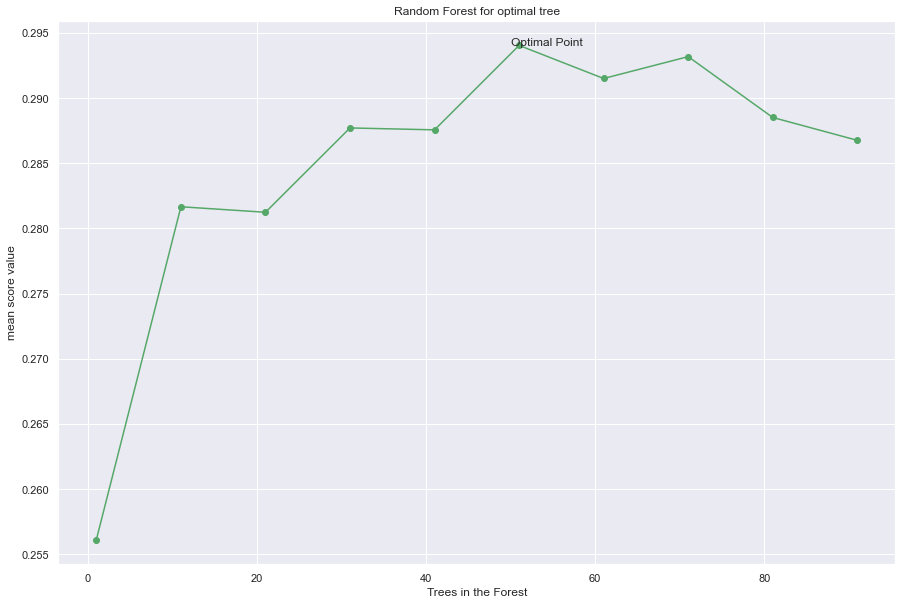

The maximum value in the list is 0.29403156182716067, which is the optimal number of trees


In [27]:
##########################################Random Forest for Red Wine########################################### 
redWineDataFrame = pd.read_csv("winequality-red.csv")

redWineDataFrame[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol','quality']] = redWineDataFrame['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

removeDefaultColumns = ['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']

redWineDataFrame.drop(removeDefaultColumns, axis = 1, inplace=True)

redWineDataFrame = redWineDataFrame.astype(float)

redWineDataFrameCorr = redWineDataFrame.loc[:, redWineDataFrame.columns != 'quality']


###########################Building Random Forest#########################################

TreeListRedWine = list(range(1, 100, 10))

valuesRedWine = []

#iterate over the neighbour List
for k in TreeListRedWine:
    RandForestValue = RandomForestClassifier(n_estimators = k, random_state=0)
    RandForestValue.fit(redWineDataFrameCorr, redWineDataFrame["quality"])
    PredictionValue = RandForestValue.predict(redWineDataFrameCorr)
    crossValidationValues = cross_validate(RandForestValue, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring='balanced_accuracy')
    getMeanScore = np.mean(crossValidationValues['test_score'])
    valuesRedWine.append(getMeanScore)

plt.plot(TreeListRedWine, valuesRedWine, "go-")
plt.text(50, max(valuesRedWine), "Optimal Point")
plt.ylabel("mean score value")
plt.xlabel("Trees in the Forest")
plt.title("Random Forest for optimal tree")
plt.show()

###############################Getting the max in the list###################################
getMaxValuesInListRedWine = max(valuesRedWine)

print(f"The maximum value in the list is {getMaxValuesInListRedWine}, which is the optimal number of trees")



# Question 4.4 

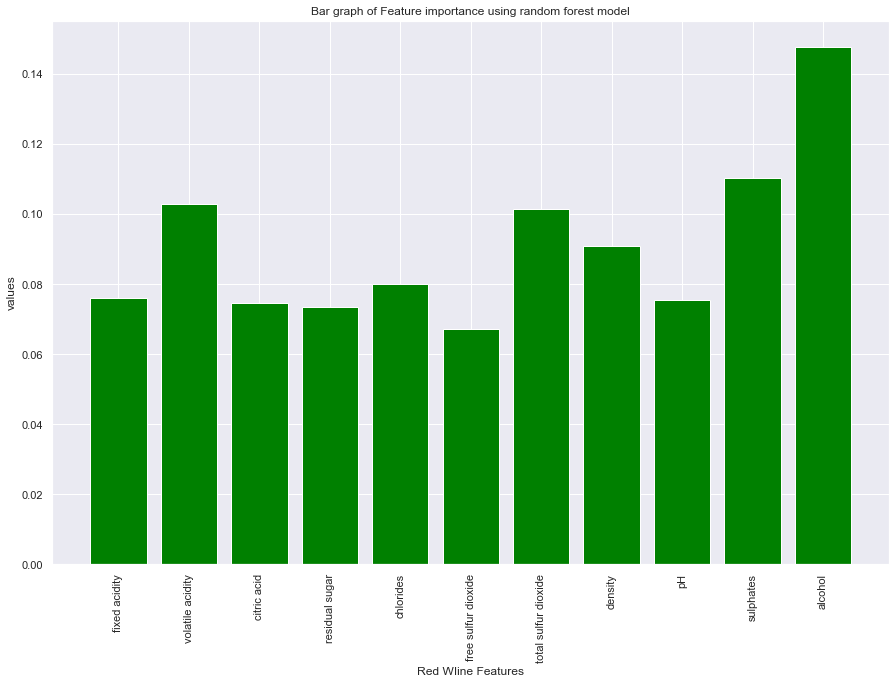

In [28]:
############################Lasso#####################################################
RedCorr = redWineDataFrameCorr.corrwith(redWineDataFrame["quality"])

storeCols = redWineDataFrameCorr.columns

lassoModel = linear_model.Lasso(alpha = 0.0001, random_state = 0)

redWhineFit = lassoModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

coefRedWine = redWhineFit.coef_

storeFeatureImportance = RandForestValue.feature_importances_
plt.bar(storeCols, storeFeatureImportance, color='green')
plt.xticks(rotation=90)
plt.ylabel("values")
plt.xlabel("Red WIine Features")
plt.title("Bar graph of Feature importance using random forest model")
plt.show()

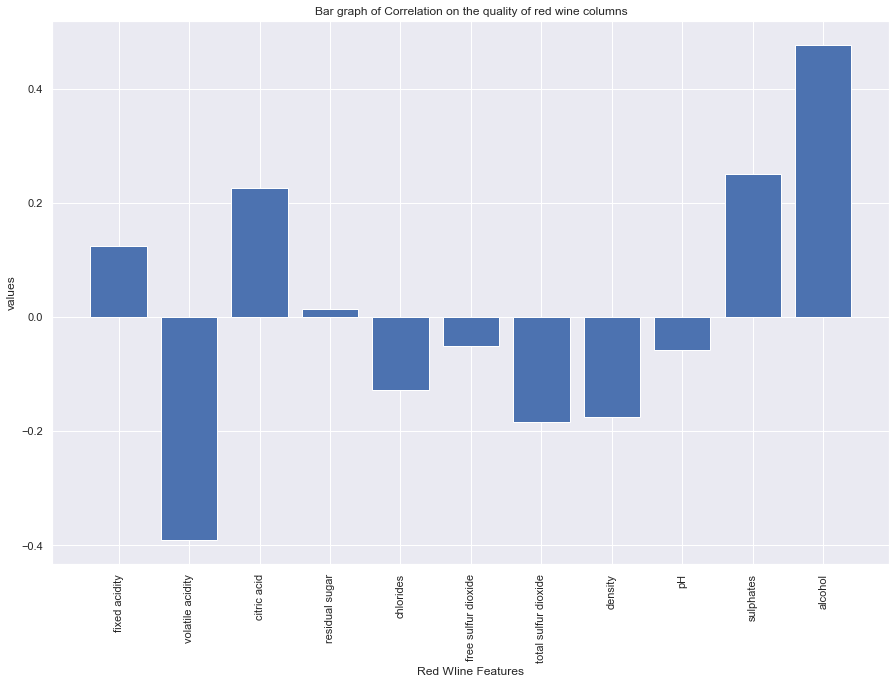

In [29]:
plt.bar(storeCols, RedCorr)
plt.xticks(rotation=90)
plt.ylabel("values")
plt.xlabel("Red WIine Features")
plt.title("Bar graph of Correlation on the quality of red wine columns")
plt.show()

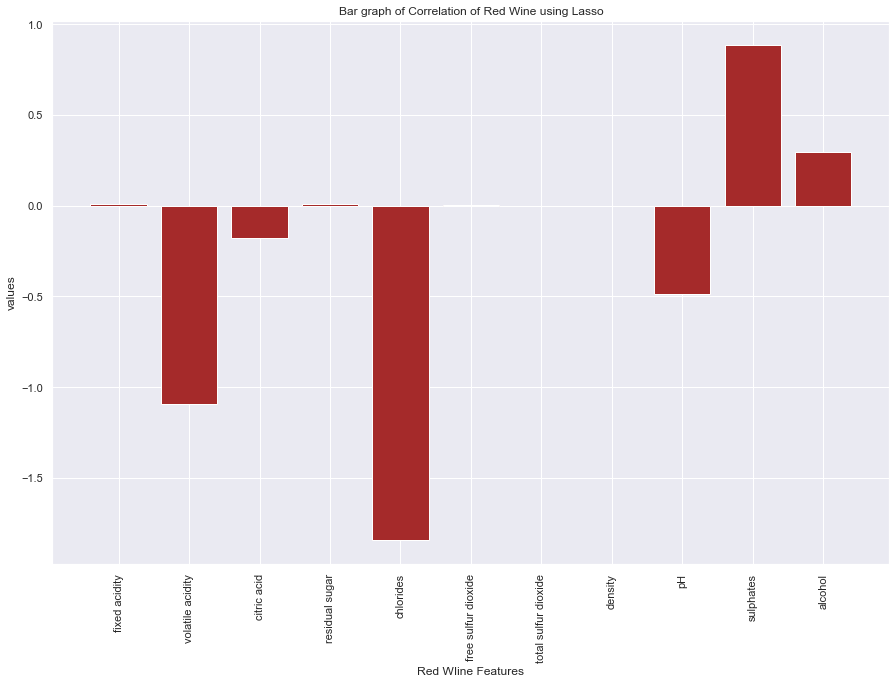

In [30]:
plt.bar(storeCols, coefRedWine, color='brown')
plt.xticks(rotation=90)
plt.ylabel("values")
plt.xlabel("Red WIine Features")
plt.title("Bar graph of Correlation of Red Wine using Lasso")
plt.show()

# Question 4.5

In [31]:
###########################Linear Regression Performance########################
#Linear regression
regModel = linear_model.LinearRegression()

regModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])
# res = regModel.score(redWineDataFrameCorr, redWineDataFrame["quality"])

res = cross_validate(regModel, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring='neg_mean_absolute_error')

finalRes = np.mean(abs(res['test_score']))

print(f"The mean square error (Linear Regression) {finalRes}")

The mean square error (Linear Regression) 0.5104055782302341


In [32]:
###############################################KNN##########################################
storeRegressor = KNeighborsRegressor()

storeRegressor.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

firstCrossValidation = cross_validate(storeRegressor, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')

firstCrossValidation = np.mean(abs(firstCrossValidation['test_score']))

print(f"The mean square error(KNN): {firstCrossValidation}")

The mean square error(KNN): 0.6296532131661442


In [33]:
##############################Random Forest###############################################
RandForestClfRedWine = RandomForestClassifier(n_estimators=50, max_leaf_nodes= 82, random_state=0)

RandForestClfRedWine.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

RandForestPerformance = cross_validate(RandForestClf, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')

getMeanScoreRedWine = np.mean(abs(RandForestPerformance['test_score']))

print(f"The mean square error(RF): {getMeanScoreRedWine}")


The mean square error(RF): 0.4602684169278997
